# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal',"Density"]

In [5]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

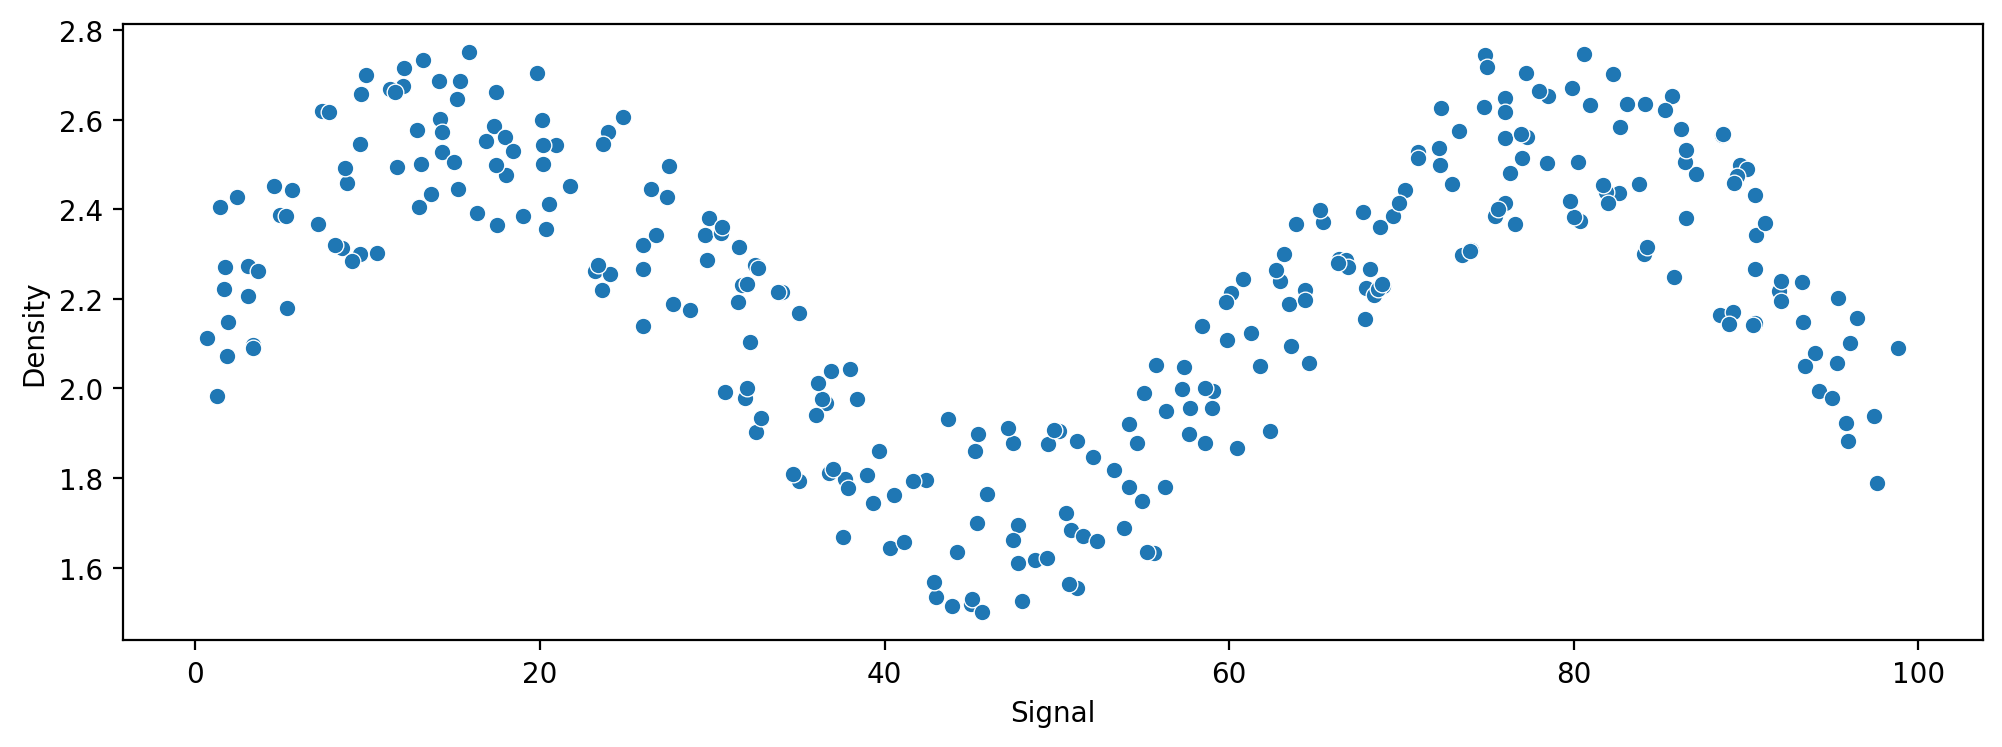

In [8]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

---
---

## Splitting the Data

Let's split the data in order to be able to have a Test set for performance metric evaluation.

In [10]:
df['Signal'].shape

(300,)

In [12]:
df['Signal'].values.reshape(-1,1).shape

(300, 1)

In [13]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [17]:
X[0:5]

array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708]])

In [18]:
y.head()

0    2.456548
1    2.601719
2    1.967004
3    2.300439
4    2.452374
Name: Density, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

-----

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr_model = LinearRegression()

In [23]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [24]:
lr_preds = lr_model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
# RMSE
np.sqrt(mean_squared_error(y_test,lr_preds))

np.float64(0.2570051996584629)

What does the fit look like?

In [27]:
signal_range = np.arange(0,100)

In [28]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

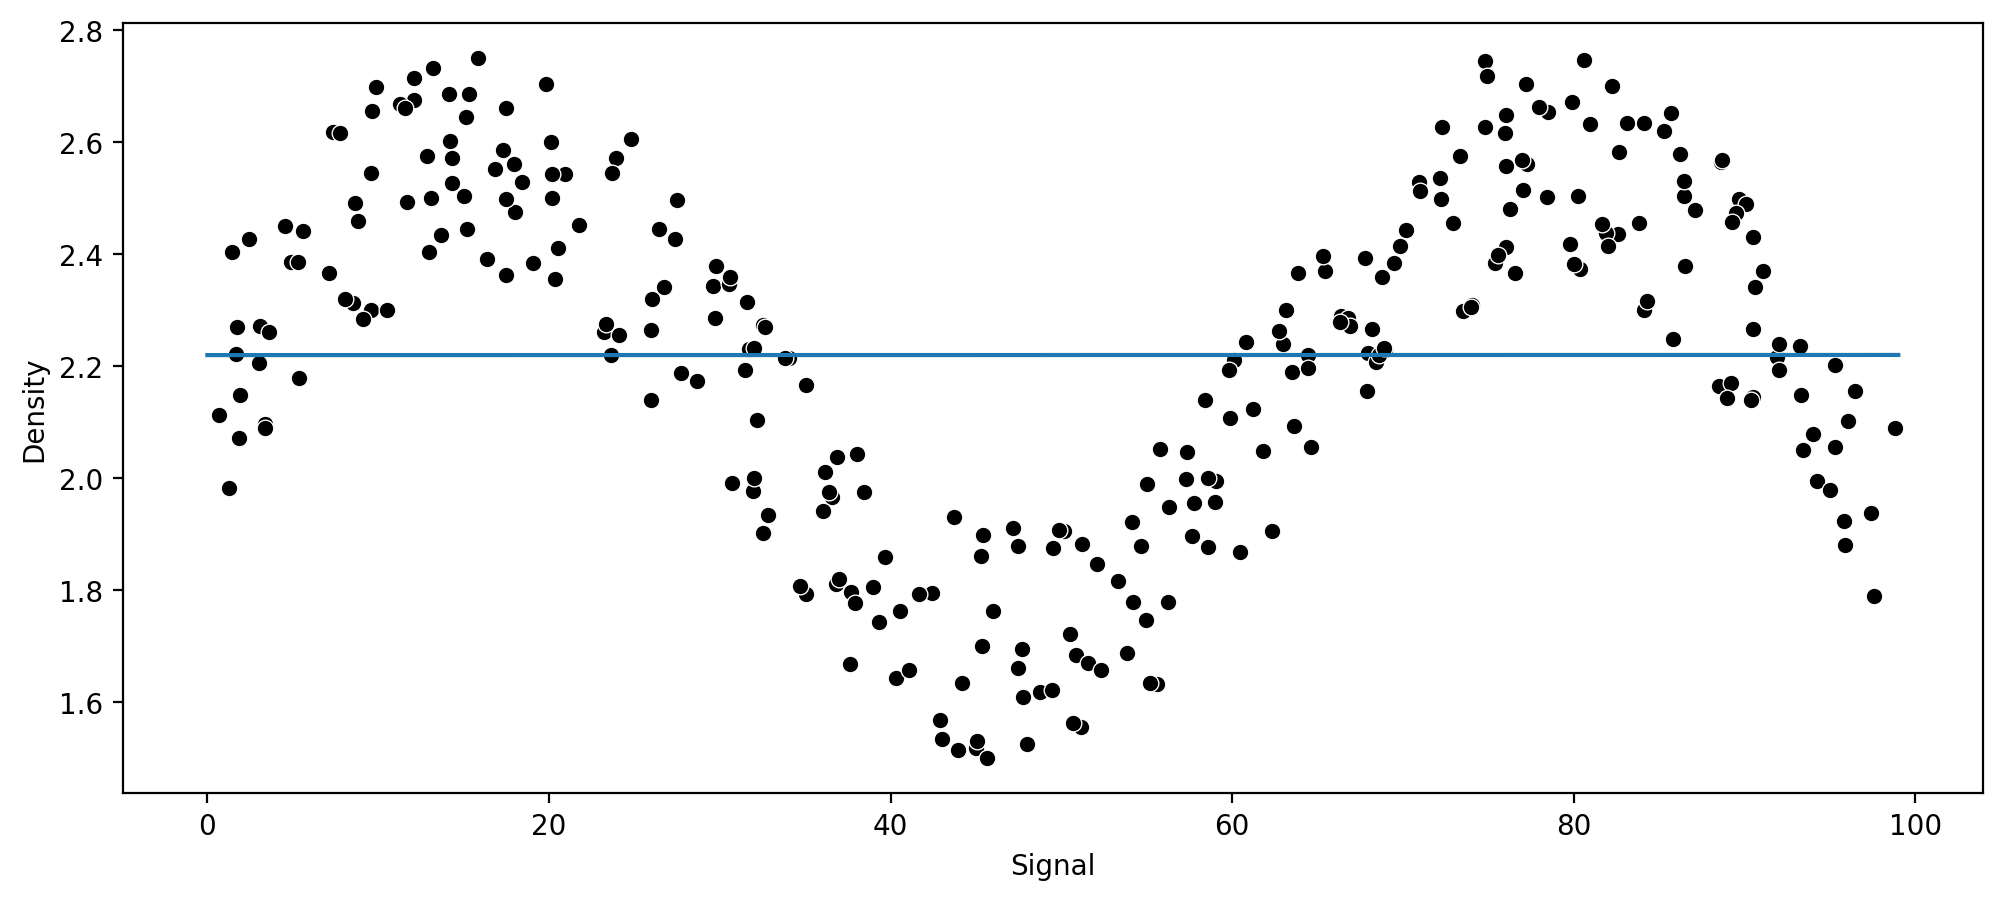

In [31]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

---

# Polynomial Regression

## Attempting with a Polynomial Regression Model

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

## Function to Help Run Models

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [37]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,5),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


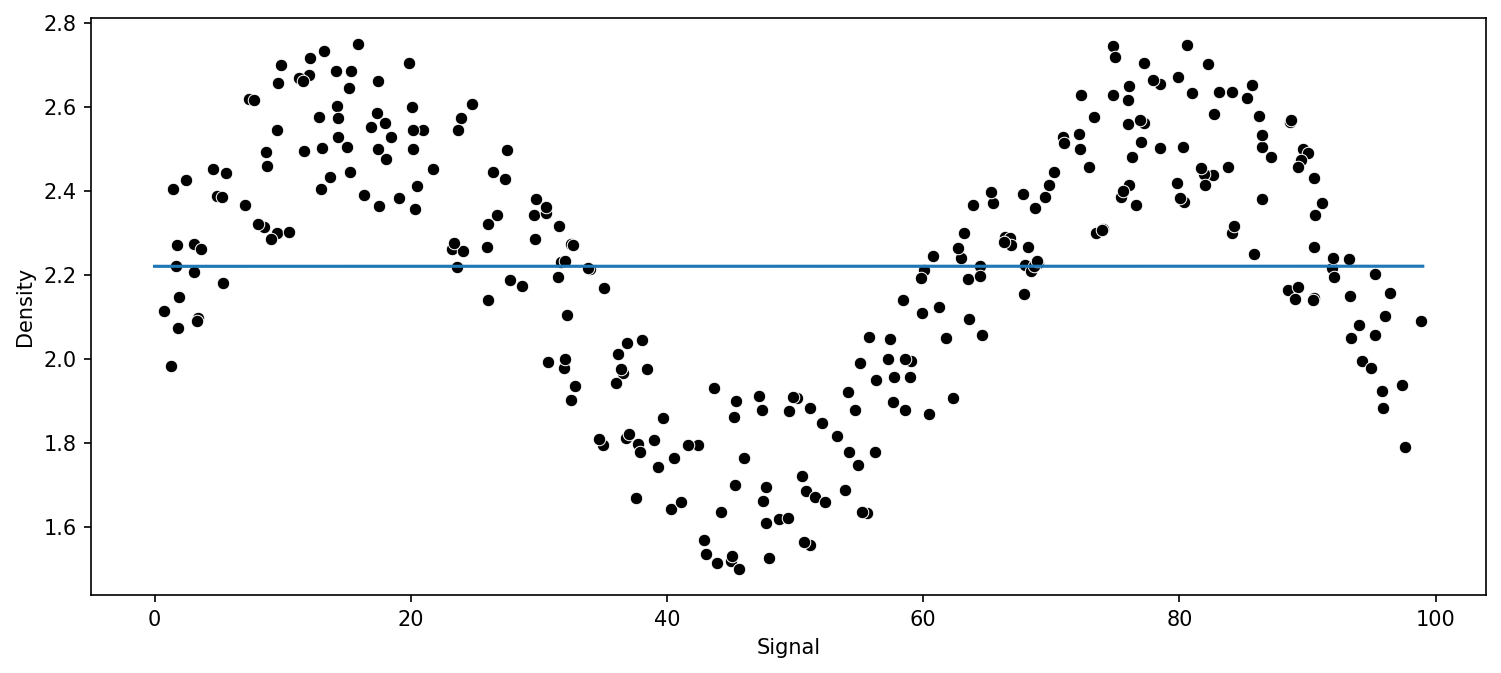

In [38]:
run_model(model,X_train,y_train,X_test,y_test)

## Pipeline for Poly Orders

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [41]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.2817309563725596


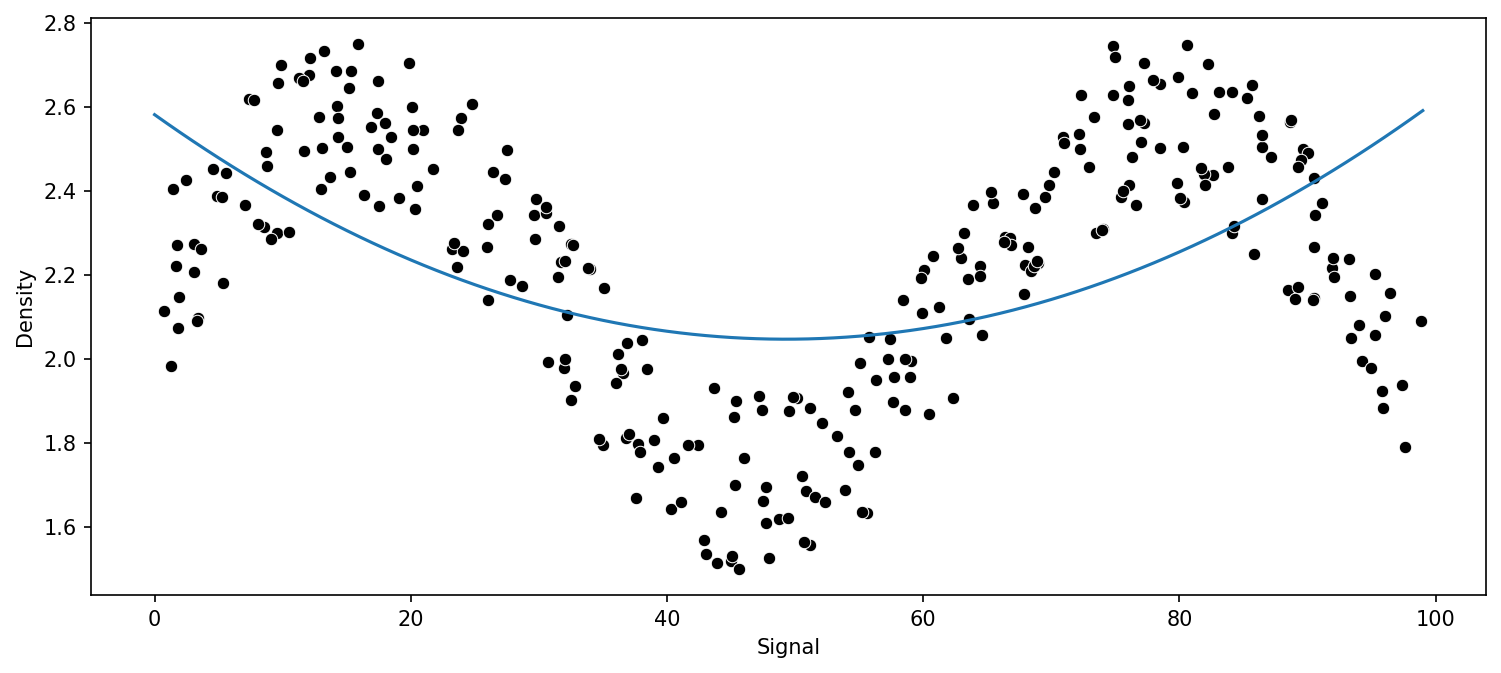

In [42]:
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.287974812791889


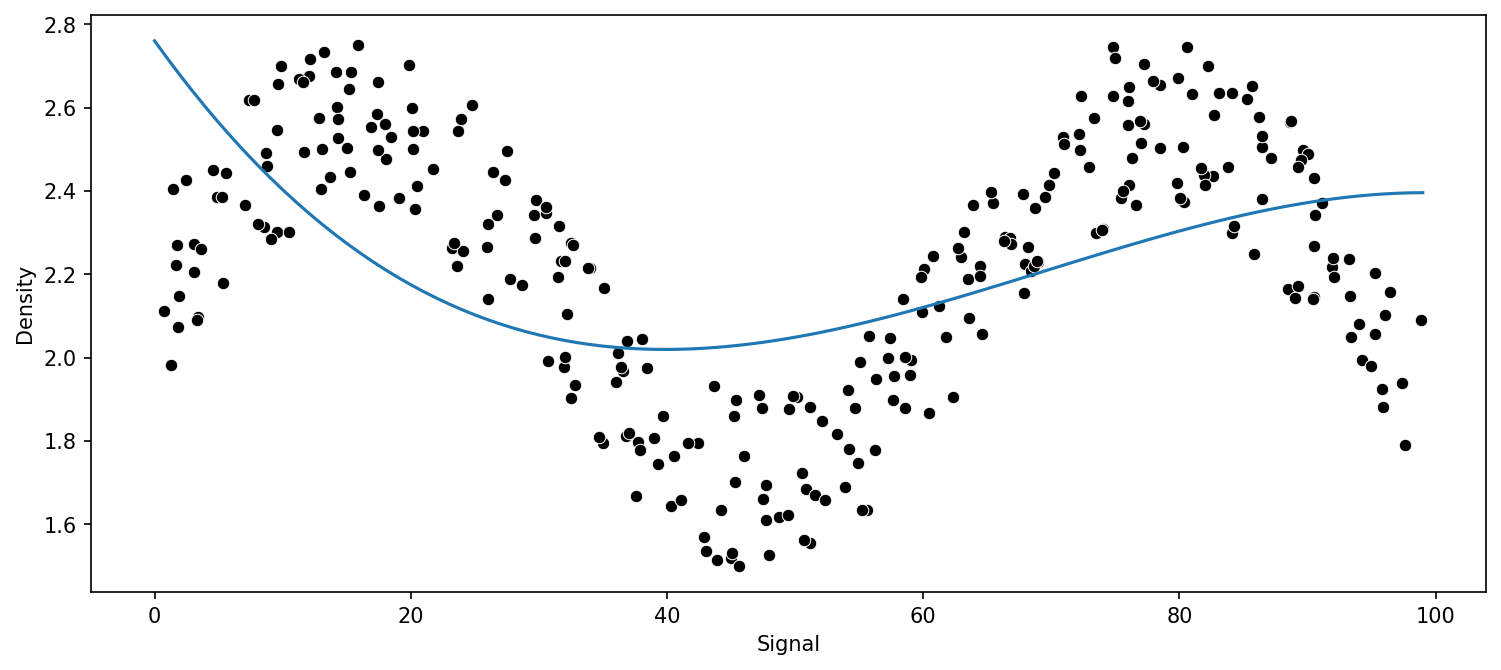

In [43]:
pipe = make_pipeline(PolynomialFeatures(3),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.14588633404158102


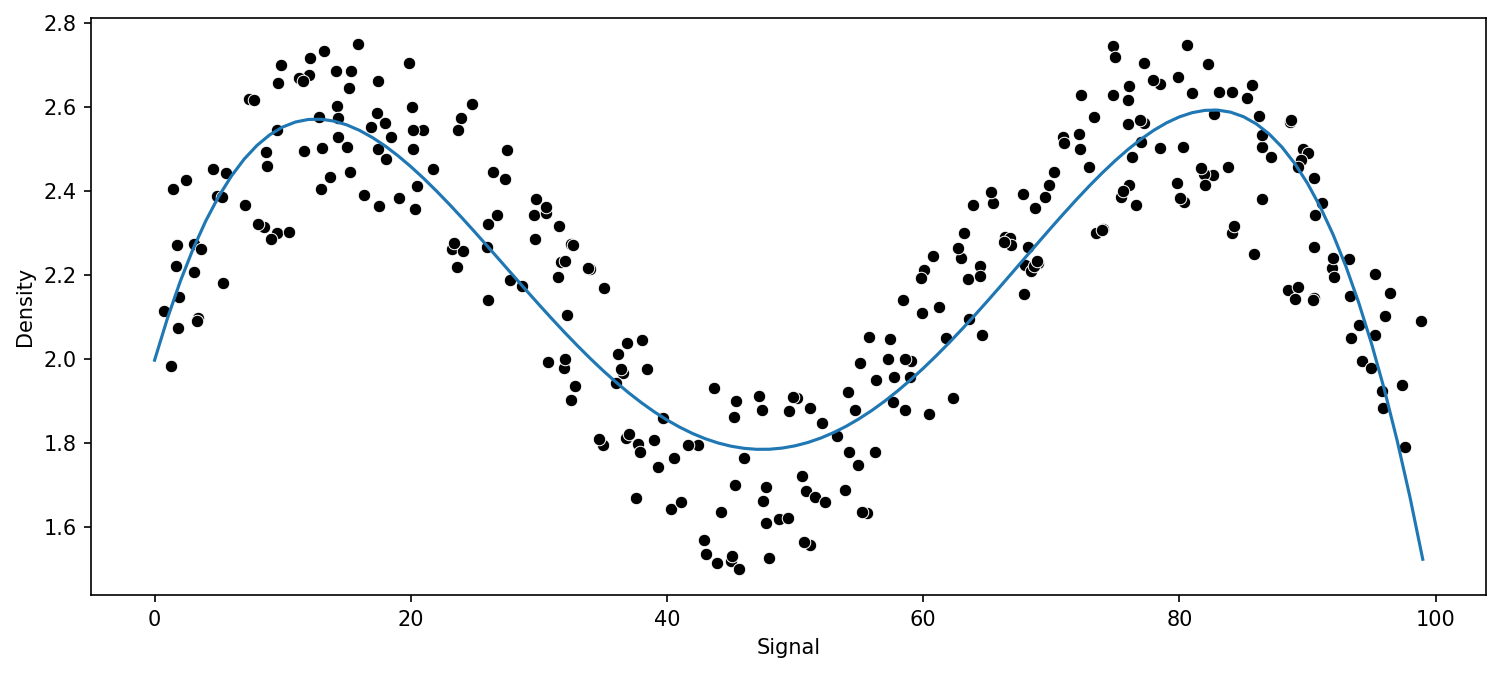

In [44]:
pipe = make_pipeline(PolynomialFeatures(4),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

## Comparing Various Polynomial Orders

RMSE : 0.14049911421019984


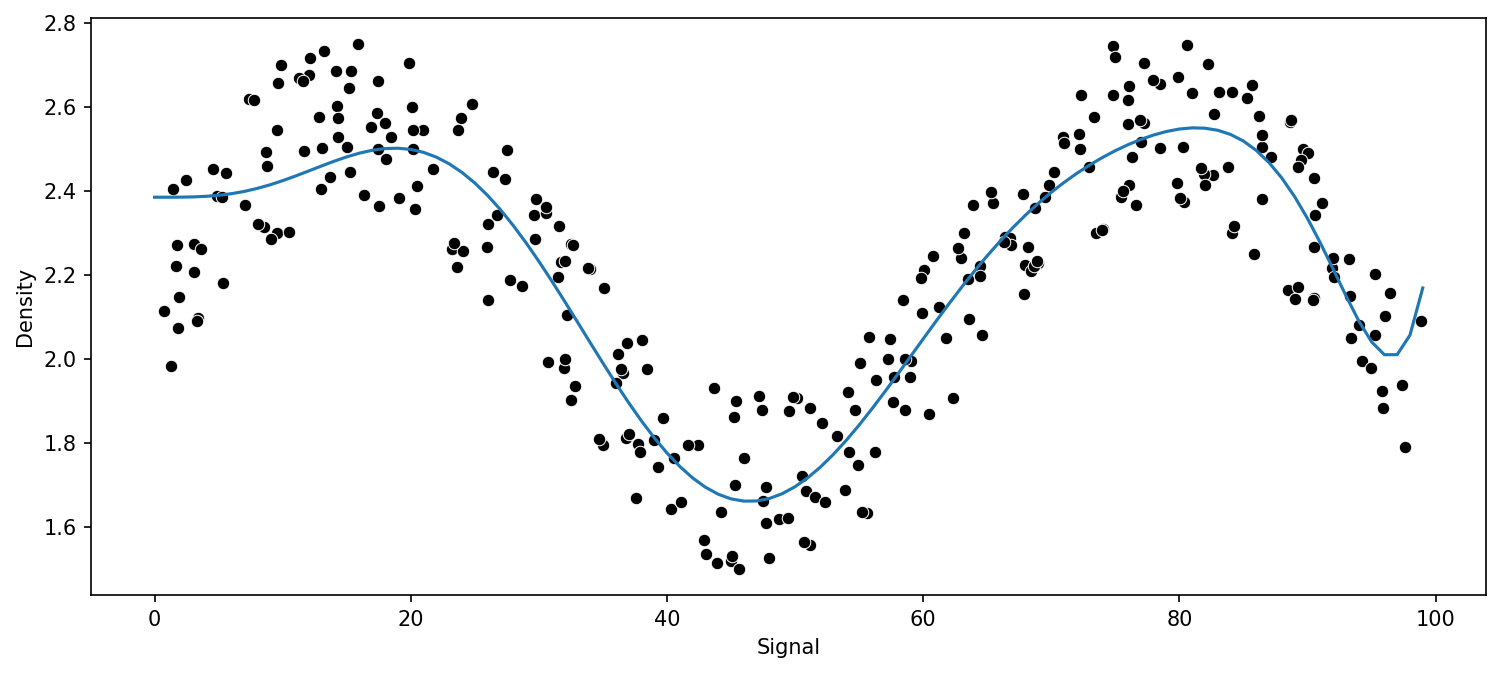

In [45]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

----

## KNN Regression

In [46]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


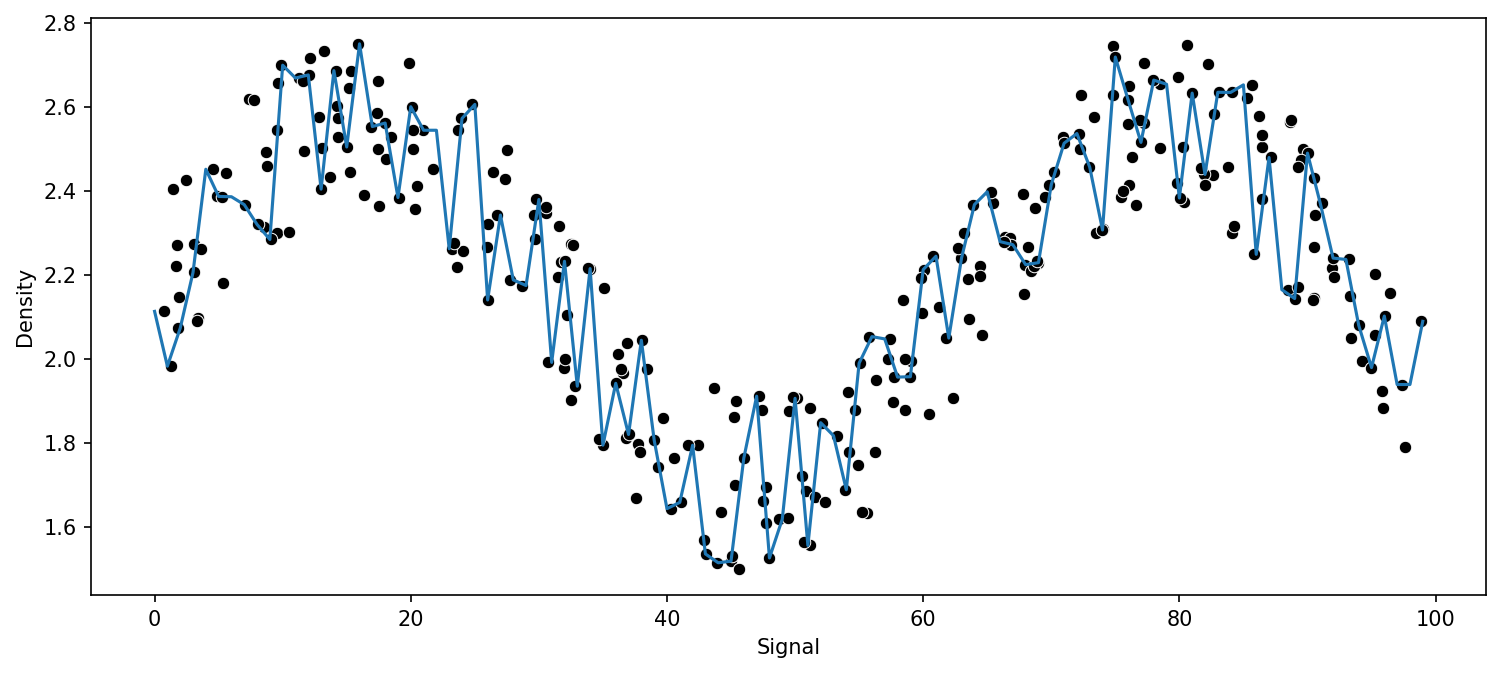

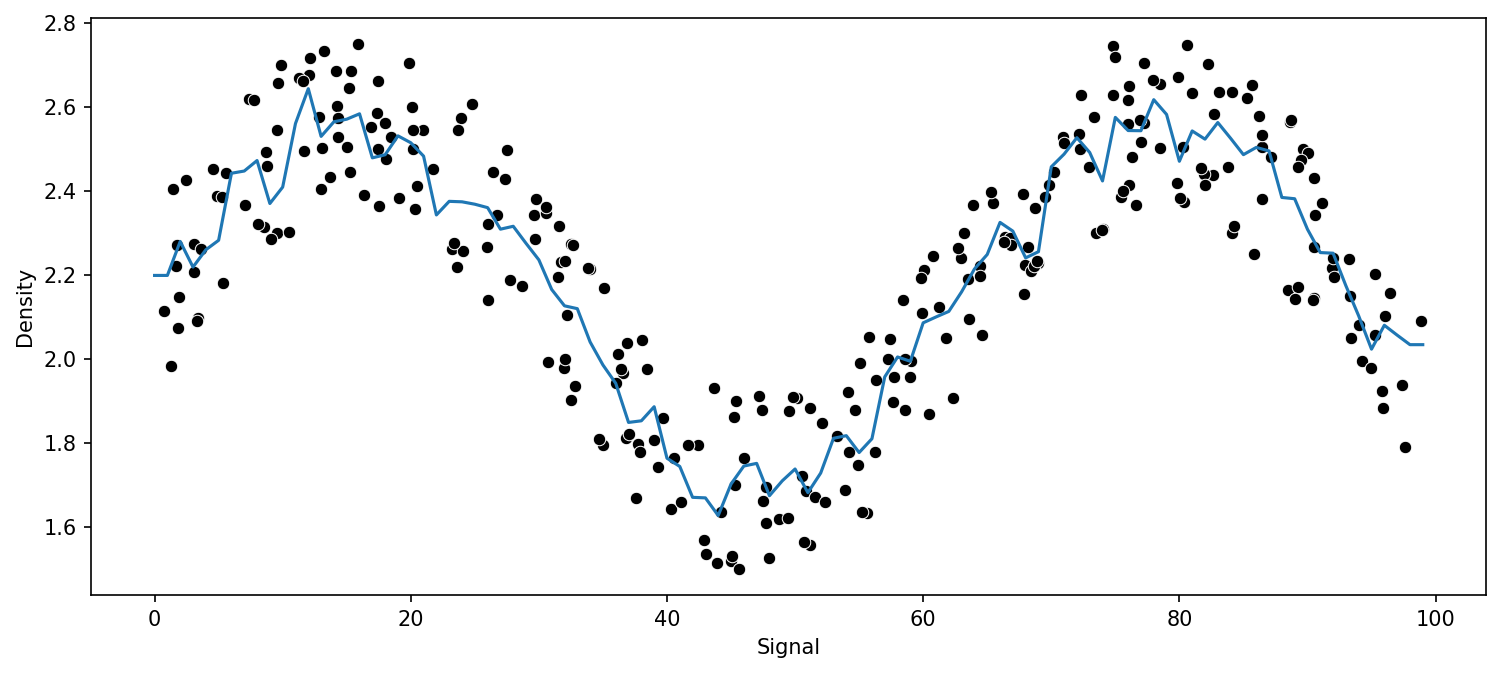

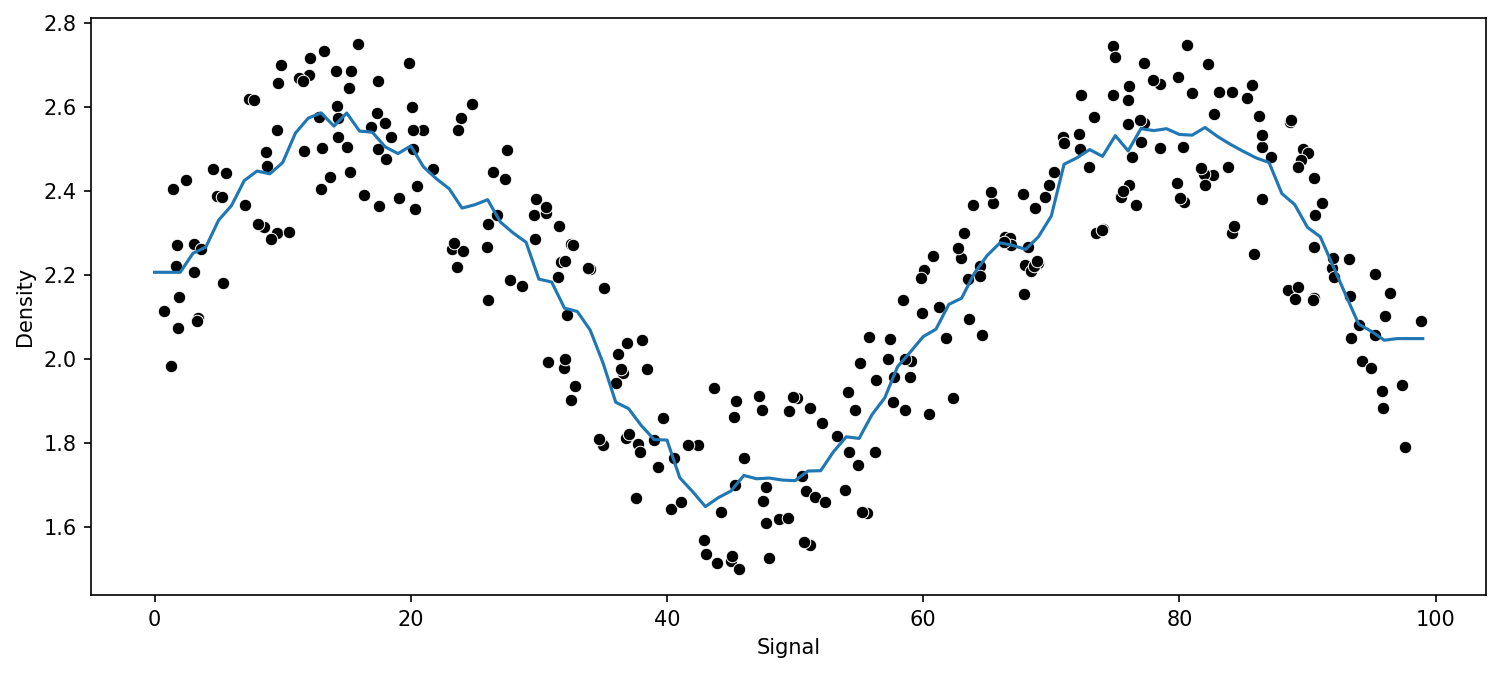

In [47]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

In [48]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


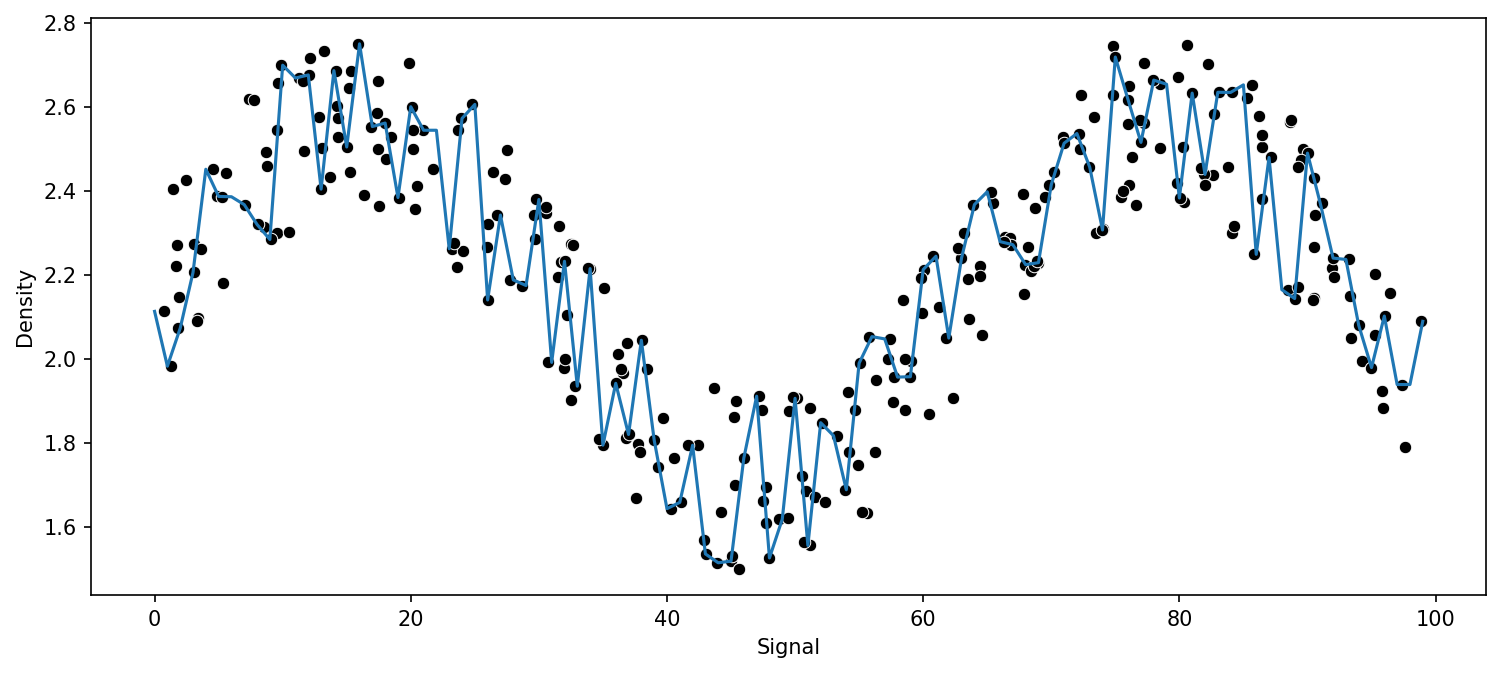

In [49]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [50]:
model.get_n_leaves()

np.int64(270)

----

## Support Vector Regression

In [52]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [54]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12646999302046696


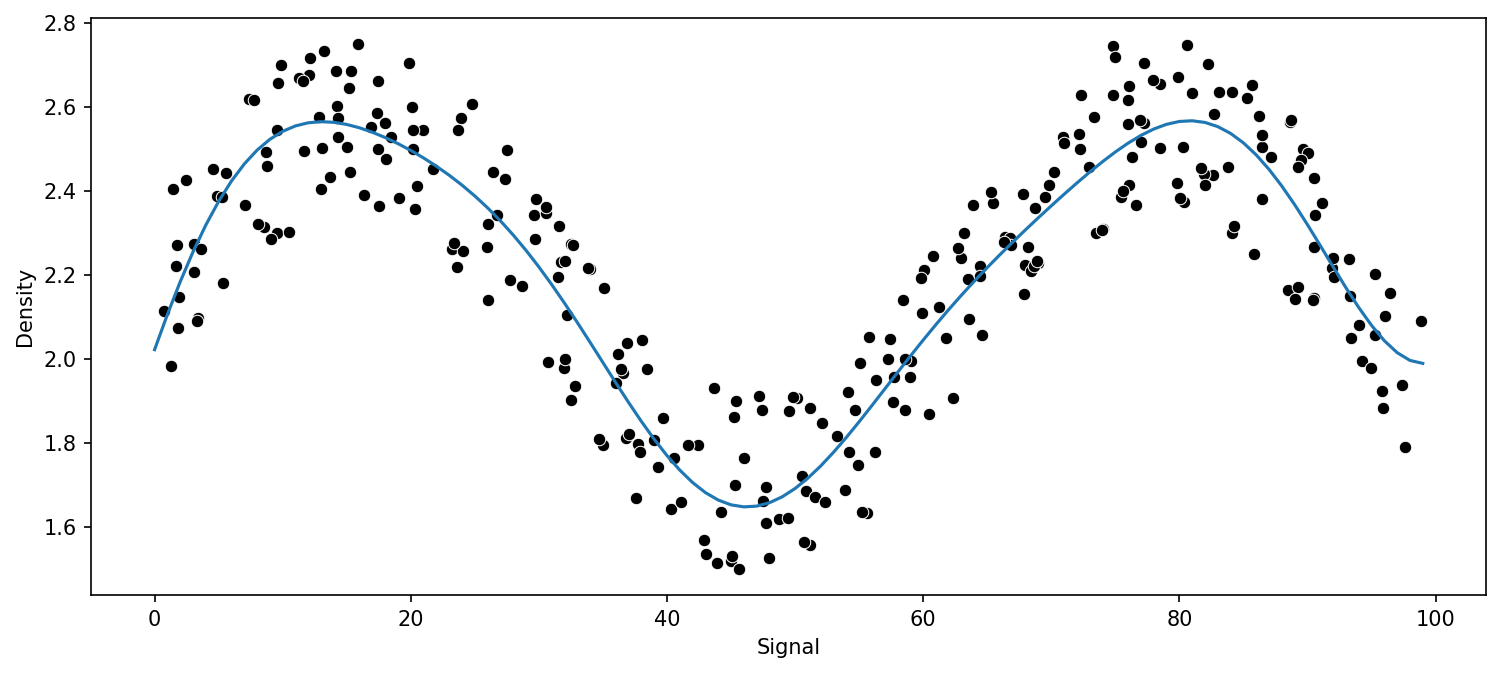

In [55]:
run_model(grid,X_train,y_train,X_test,y_test)

In [56]:
grid.best_estimator_

SVR(C=1000)

---

## Random Forest Regression

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# help(RandomForestRegressor)

RMSE : 0.15316559355712397
RMSE : 0.13626636215526142
RMSE : 0.13589604800751914


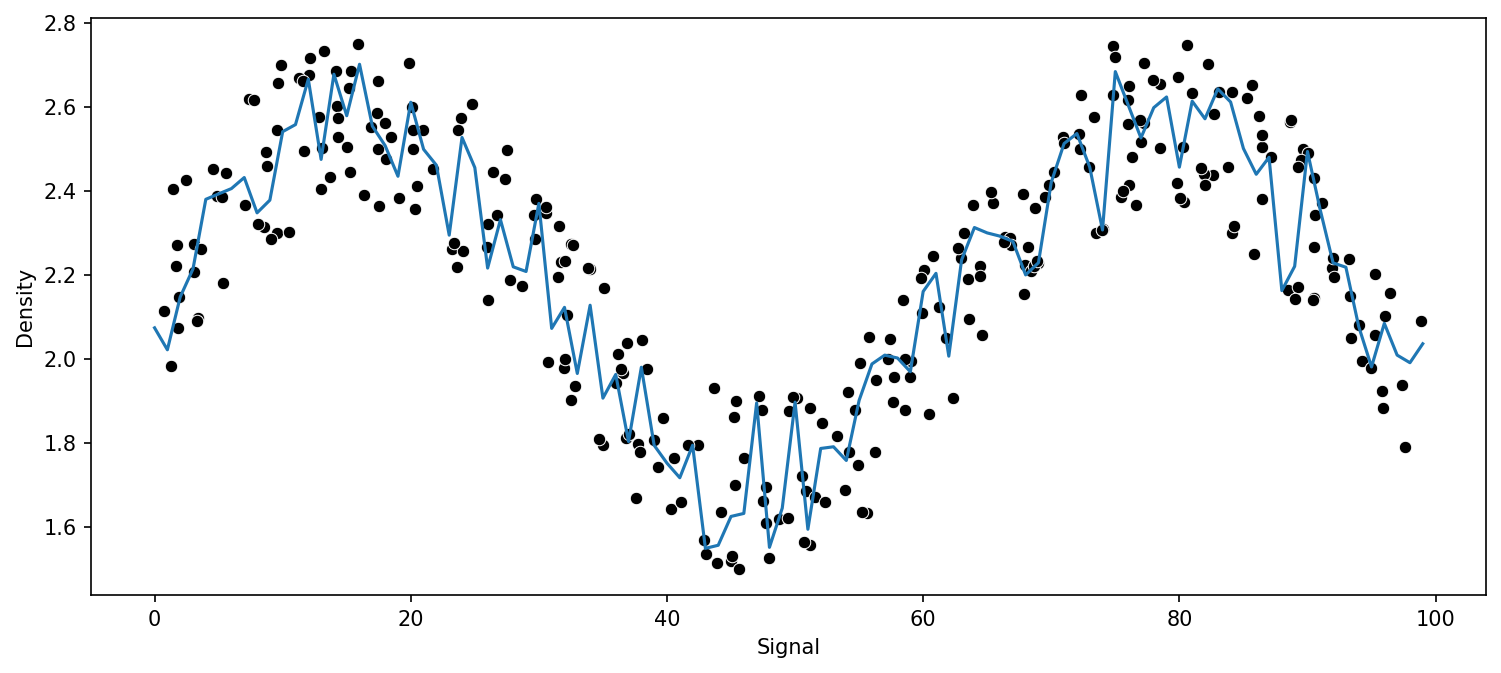

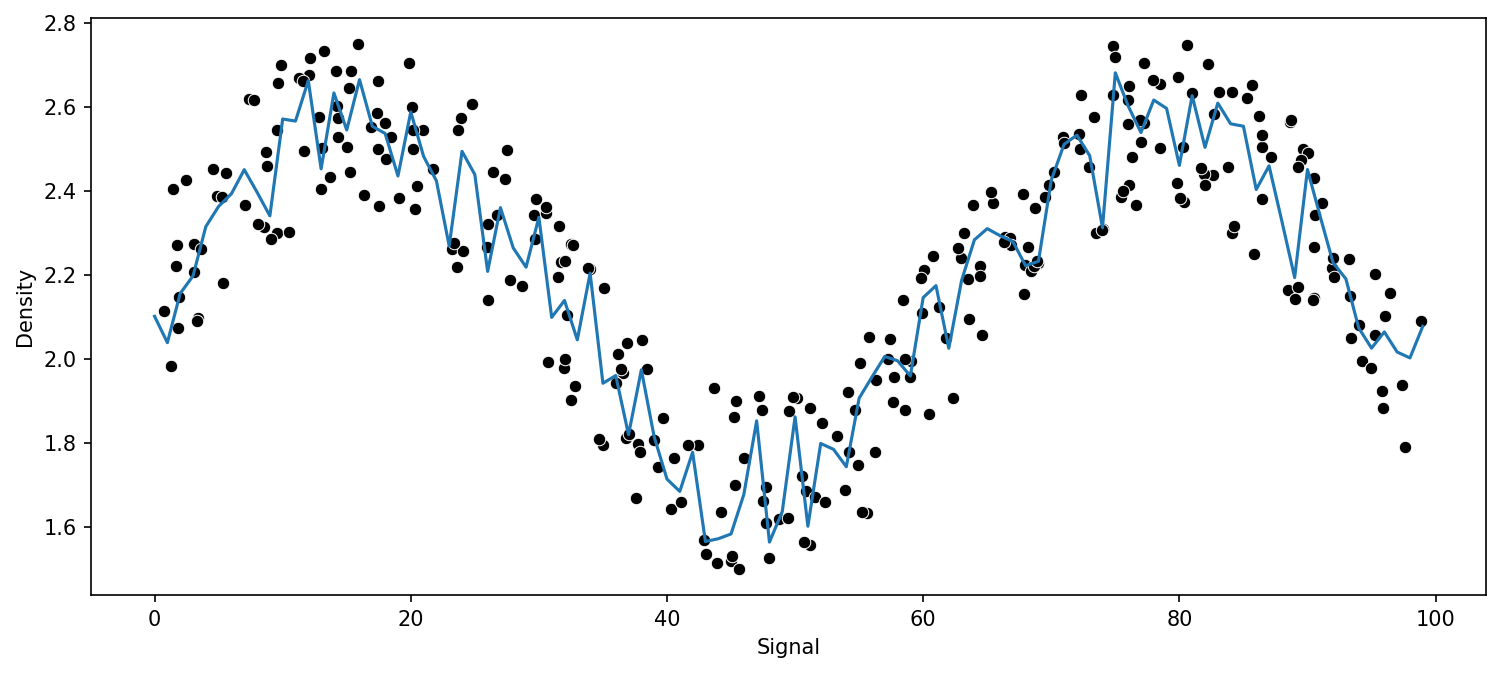

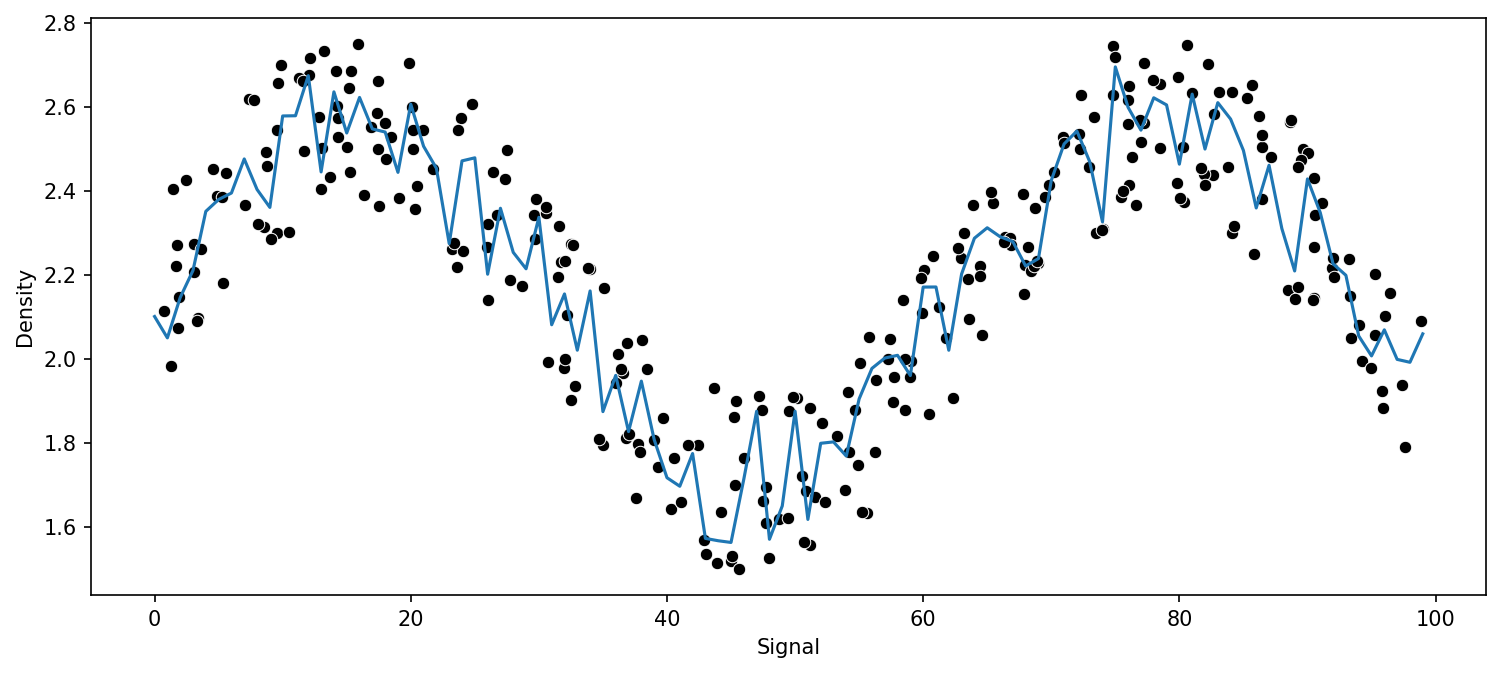

In [58]:
trees = [10,50,100]
for n in trees:
    model = RandomForestRegressor(n_estimators=n)
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting

We will cover this in more detail in next section.

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# help(GradientBoostingRegressor)

RMSE : 0.13294148649584667


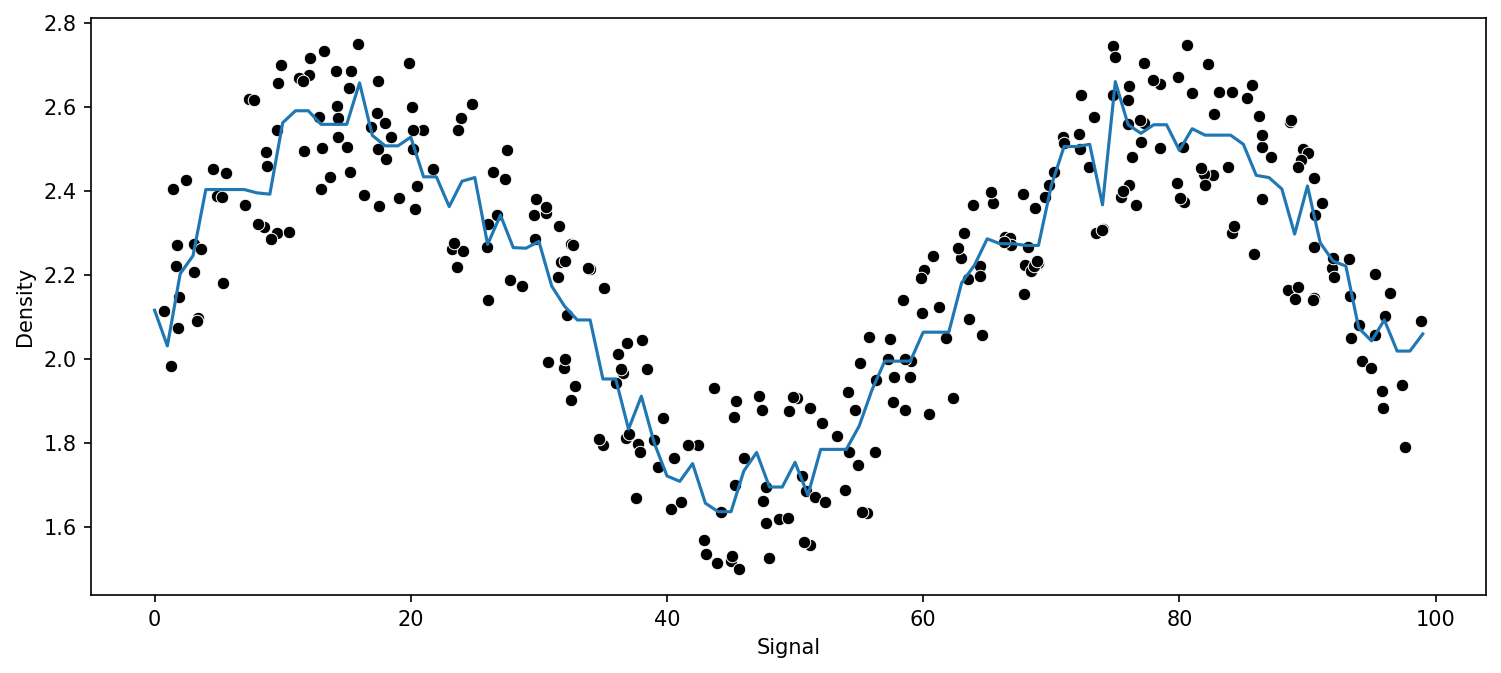

In [60]:
   
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [61]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13746035459139183


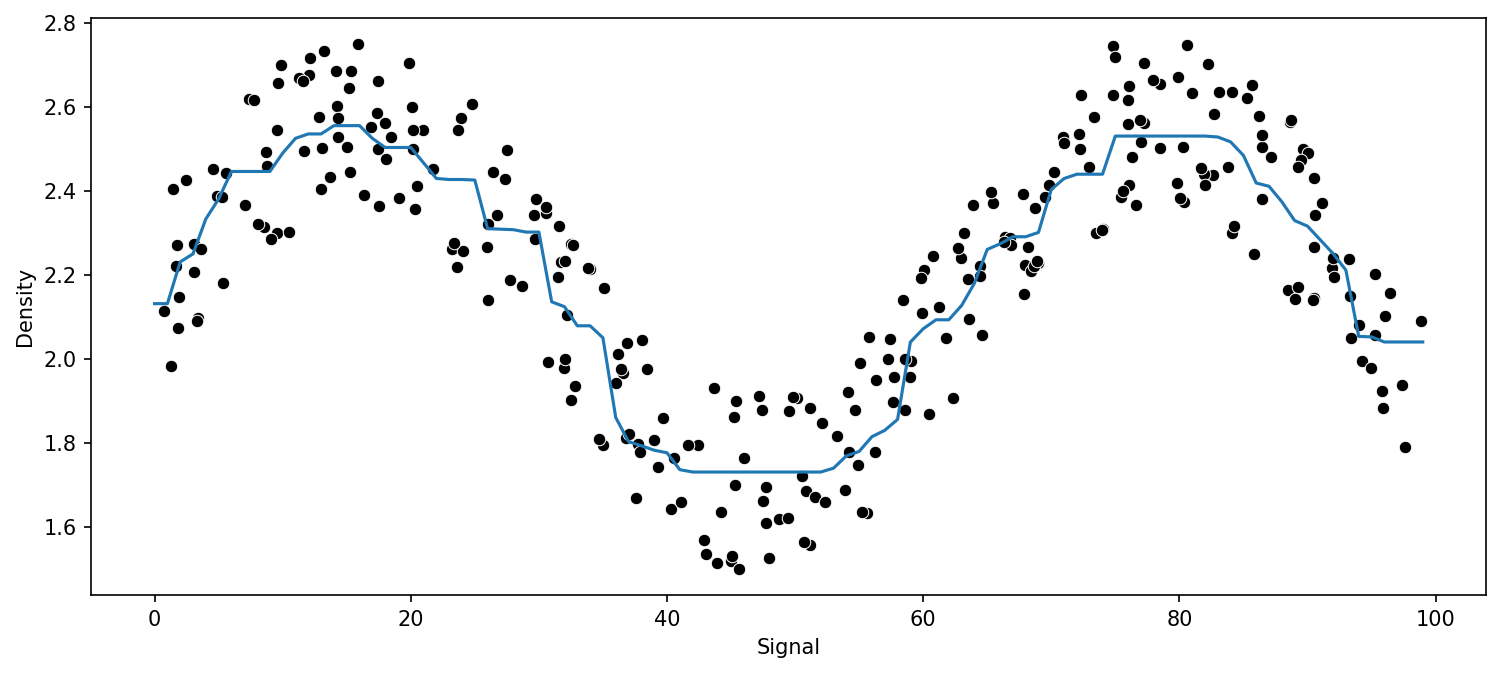

In [62]:
model = AdaBoostRegressor()

run_model(model,X_train,y_train,X_test,y_test)

----